In [2]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
import plotly.graph_objects as go
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
df = pd.read_csv('dataset/marketing_campaign.csv', header=0, sep='\t')
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# percentage of empty values by features
missing_percentages = df.isna().sum() / df.shape[0]
missing_percentages = missing_percentages[missing_percentages > 0].sort_values()
print(missing_percentages)

Income    0.010714
dtype: float64


In [6]:
# check the null income rows
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


As the income column is not null for a specific characteristics of df and the percentage is too low. Maybe these people dont wanted to disclouse their income. So, we can drop the rows where income is null.

In [7]:
# Remove the rows where income is null
df = df.dropna(subset=['Income'])

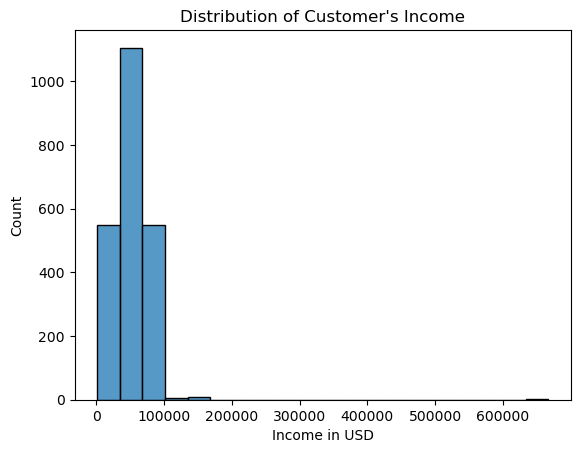

In [8]:
sns.histplot(df['Income'], bins = 20)
plt.title("Distribution of Customer's Income")
plt.xlabel("Income in USD")
plt.show()

In [9]:
px.box(df, 'Income', title='Distribution of Customer\'s Income')

c:\Users\avish\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\avish\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [10]:
# defining outliers
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [11]:
# income outliers
outliers_income = find_outliers_IQR(df['Income'])
print("number of outliers: "+ str(len(outliers_income)))
print("max outlier value: "+ str(outliers_income.max()))
print("min outlier value: "+ str(outliers_income.min()))
outliers_income

number of outliers: 8
max outlier value: 666666.0
min outlier value: 153924.0


164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64

In [12]:
# removing the outliers
df = df[df['Income'] < 153924]

In [13]:
# add age column
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year_Birth']

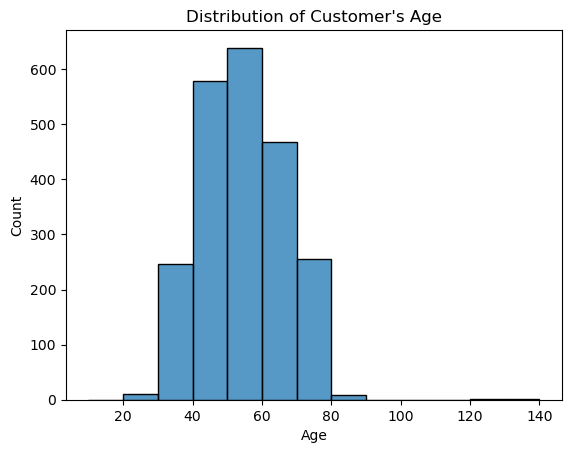

In [14]:
sns.histplot(df['Age'], bins = list(range(10, 150, 10)))
plt.title("Distribution of Customer's Age")
plt.show()

In [15]:
px.box(df, 'Age')

c:\Users\avish\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\avish\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



Probably who are above 100 they are not using emails or any social media. Thats why we are removing them.

In [16]:
# age outliers
outliers_age = find_outliers_IQR(df['Age'])
print("number of outliers: "+ str(len(outliers_age)))
print("max outlier value: "+ str(outliers_age.max()))
print("min outlier value: "+ str(outliers_age.min()))
outliers_age

number of outliers: 3
max outlier value: 130
min outlier value: 123


192    123
239    130
339    124
Name: Age, dtype: int64

In [17]:
# removing the outliers
df = df[df['Age'] < 123]

Create some new features in the dfset to define the customer personalities as a part of df preparation

In [18]:
# total spendings
df['Spending'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [19]:
# total spending relation with income 
fig = px.scatter(data_frame=df, x="Income",
                 y="Spending",
                 title="Relationship Between Customer's Income and Total Amount Spent",
                height=500,
                color_discrete_sequence = px.colors.qualitative.G10[1:])
fig.show()

c:\Users\avish\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\avish\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



We can see that there's a positive correlation between income and total amount spent.

In [20]:
# customer asscoiated with the company in months
today = datetime.datetime.now().date()
df['Seniority']=pd.to_datetime(df['Dt_Customer'], dayfirst=True,format = '%d-%m-%Y')
df['Seniority'] = pd.to_numeric(df['Seniority'].dt.date.apply(lambda x: (today - x)).dt.days, downcast='integer')/30

In [21]:
# renaming some columns
df=df.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})

In [22]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [23]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [24]:
# renaming unique values to reduce the number of groups
df['Marital_Status']=df['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'Couple','Together':'Couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})
df['Education']=df['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Graduate','Master':'Postgraduate','PhD':'Postgraduate'})

In [25]:
# make a new column children
df['Children']=df['Kidhome']+df['Teenhome']

In [26]:
df['Children'].unique()

array([0, 2, 1, 3], dtype=int64)

In [27]:
# creating new column depend on child
df['Has_child'] = np.where(df.Children> 0, 'Has child', 'No child')
# making children column numeric to categoraical
df['Children'].replace({3: "3 children",2:'2 children',1:'1 child',0:"No child"},inplace=True)

In [28]:
# renaming products columns
df=df.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

In [29]:
# relationship between income, total spending and customer education
fig = px.scatter(
    data_frame=df,
    x = "Income",
    y= "Spending",
    title = "Relationship between Income VS Total Amount Spent Based on Education",
    color = "Education",
    height=500
)
fig.show()

c:\Users\avish\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\avish\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



Customers with an Undergraduate education level generally spend less than other customers with higher levels of education. This is because undergraduate customers typically earn less than other customers, which affects their spending habits.

In [30]:
# relationship between income, total spending and haivng child
fig = px.scatter(
    data_frame=df,
    x = "Income",
    y= "Spending",
    title = "Relationship between Income VS Total Amount Spent Based on Having Child",
    color = "Has_child",
    height=500
)
fig.show()

c:\Users\avish\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\avish\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



Seems those who doesnt have any children on average earn more and spend more. May be people who has no children do some side hustle as they dont have to spend time with their children that's how they earn more. And as they dont have children they might be less care about savings and spend more.

In [31]:
data = df[['Age','Education','Marital_Status','Income','Spending','Seniority','Has_child','Children','Wines','Fruits','Meat','Fish','Sweets','Gold']]
data.head(3)

,Age,Education,Marital_Status,Income,Spending,Seniority,Has_child,Children,Wines,Fruits,Meat,Fish,Sweets,Gold
0,66,Graduate,Alone,58138.0,1617,128.200000,No child,No child,635,88,546,172,88,88
1,69,Graduate,Alone,46344.0,27,109.866667,Has child,2 children,11,1,6,2,1,6
2,58,Graduate,Couple,71613.0,776,116.500000,No child,No child,426,49,127,111,21,42


#### Clustering
To take a look at the clustering of customers in the dataset, I’ll define the segments of the clients. Here we will use 4 equally weighted customer segments:

**Stars**: Old customers with high income and high spending nature.  
**Need Attention**: New customers with below-average income and low spending nature.   
**High Potential**: New customers with high income and high spending nature.  
**Leaky Bucket**: Old customers with below-average income and a low spending nature.

In [32]:
scaler=StandardScaler()
dataset_temp=data[['Income','Seniority','Spending']]
X_std=scaler.fit_transform(dataset_temp)
X = normalize(X_std,norm='l2')

gmm=GaussianMixture(n_components=4, covariance_type='spherical',max_iter=2000, random_state=5).fit(X)
labels = gmm.predict(X)
dataset_temp['Cluster'] = labels
dataset_temp=dataset_temp.replace({0:'Stars',1:'Need attention',2:'High potential',3:'Leaky bucket'})
# clustering dataset
data = df.merge(dataset_temp.Cluster, left_index=True, right_index=True)

pd.options.display.float_format = "{:.0f}".format
summary=data[['Income','Spending','Seniority','Cluster']]
summary.set_index("Cluster", inplace = True)
summary=summary.groupby('Cluster').describe().transpose()
summary.head()

C:\Users\avish\AppData\Local\Temp\ipykernel_9500\3795282373.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Cluster       High potential  Leaky bucket  Need attention  Stars
Income count             533           636             455    581
       mean            69267         37623           72274  34586
       std             11335         12365            9870  11938
       min             44802          1730           49090   2447
       25%             60689         28735           65182  26487

In [33]:
PLOT = go.Figure()
for C in list(data.Cluster.unique()):
    

    PLOT.add_trace(go.Scatter3d(x = data[data.Cluster == C]['Income'],
                                y = data[data.Cluster == C]['Seniority'],
                                z = data[data.Cluster == C]['Spending'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(C)))
PLOT.update_traces(hovertemplate='Income: %{x} <br>Seniority: %{y} <br>Spending: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Income', titlefont_color = 'black'),
                                yaxis=dict(title = 'Seniority', titlefont_color = 'black'),
                                zaxis=dict(title = 'Spending', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

c:\Users\avish\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\avish\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



### Data Preparation for Customer Personality Analysis

I will be defining three segments of the customers according to the age, income and seniority

In [57]:
#Create Age segment
cut_labels_Age = ['Young', 'Adult', 'Mature', 'Senior']
cut_bins = [0, 30, 45, 65, 120]
data['Age_group'] = pd.cut(data['Age'], bins=cut_bins, labels=cut_labels_Age)
# Create Income segment
cut_labels_Income = ['Low income', 'Low to medium income', 'Medium to high income', 'High income']
data['Income_group'] = pd.qcut(data['Income'], q=4, labels=cut_labels_Income)
# Create Seniority segment
cut_labels_Seniority = ['New customers', 'Discovering customers', 'Experienced customers', 'Old customers']
data['Seniority_group'] = pd.qcut(data['Seniority'], q=4, labels=cut_labels_Seniority)
df_segmented=data.drop(columns=['Age','Income','Seniority'])

Define new segments according to the spending of customers on each product which will be based on:

- Non Buyer
- Low Buyer
- Frequent Buyer
- Biggest Buyer

In [58]:
cut_labels = ['Low consumer', 'Frequent consumer', 'Biggest consumer']
df_segmented['Wines_segment'] = pd.qcut(df_segmented['Wines'][df_segmented['Wines']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
df_segmented['Fruits_segment'] = pd.qcut(df_segmented['Fruits'][df_segmented['Fruits']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
df_segmented['Meat_segment'] = pd.qcut(df_segmented['Meat'][df_segmented['Meat']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
df_segmented['Fish_segment'] = pd.qcut(df_segmented['Fish'][df_segmented['Fish']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
df_segmented['Sweets_segment'] = pd.qcut(df_segmented['Sweets'][df_segmented['Sweets']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
df_segmented['Gold_segment'] = pd.qcut(df_segmented['Gold'][df_segmented['Gold']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
df_segmented.replace(np.nan, "Non consumer",inplace=True)
df_segmented.drop(columns=['Spending','Wines','Fruits','Meat','Fish','Sweets','Gold'],inplace=True)
df_segmented = df_segmented.astype(object)

In [46]:
df_segmented.head()

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,Web,Catalog,Store,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Has_child,Cluster,Age_group,Income_group,Seniority_group,Wines_segment,Fruits_segment,Meat_segment,Fish_segment,Sweets_segment,Gold_segment
0,5524,1957,Graduate,Alone,0,0,04-09-2012,58,3,8,10,4,7,0,0,0,0,0,0,3,11,1,No child,No child,High potential,Senior,Medium to high income,Old customers,Biggest consumer,Biggest consumer,Biggest consumer,Biggest consumer,Biggest consumer,Biggest consumer
1,2174,1954,Graduate,Alone,1,1,08-03-2014,38,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2 children,Has child,Leaky bucket,Senior,Low to medium income,New customers,Low consumer,Low consumer,Low consumer,Low consumer,Low consumer,Low consumer
2,4141,1965,Graduate,Couple,0,0,21-08-2013,26,1,8,2,10,4,0,0,0,0,0,0,3,11,0,No child,No child,Need attention,Mature,High income,Discovering customers,Frequent consumer,Biggest consumer,Frequent consumer,Biggest consumer,Frequent consumer,Frequent consumer
3,6182,1984,Graduate,Couple,1,0,10-02-2014,26,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1 child,Has child,Leaky bucket,Adult,Low income,New customers,Low consumer,Low consumer,Frequent consumer,Frequent consumer,Low consumer,Low consumer
4,5324,1981,Postgraduate,Couple,1,0,19-01-2014,94,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1 child,Has child,Need attention,Adult,Medium to high income,New customers,Frequent consumer,Frequent consumer,Frequent consumer,Frequent consumer,Frequent consumer,Frequent consumer


In [39]:
df_segmented.to_csv('df_segmented.csv', index=False)

In [47]:
df_segmented.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases', 'Web',
       'Catalog', 'Store', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
       'Z_CostContact', 'Z_Revenue', 'Response', 'Children', 'Has_child',
       'Cluster', 'Age_group', 'Income_group', 'Seniority_group',
       'Wines_segment', 'Fruits_segment', 'Meat_segment', 'Fish_segment',
       'Sweets_segment', 'Gold_segment'],
      dtype='object')

In [48]:
# remove the 'age' and 'city' columns
df_segmented = df_segmented.drop(['ID', 'Year_Birth', "Kidhome", "Teenhome", "Dt_Customer", 'Recency', "NumDealsPurchases", "Web", "Catalog", 'Store',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'], axis=1)

In [49]:
df_segmented.columns

Index(['Education', 'Marital_Status', 'Children', 'Has_child', 'Cluster',
       'Age_group', 'Income_group', 'Seniority_group', 'Wines_segment',
       'Fruits_segment', 'Meat_segment', 'Fish_segment', 'Sweets_segment',
       'Gold_segment'],
      dtype='object')

### Apriori Algorithm

In [59]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 999)
pd.options.display.float_format = "{:.3f}".format
association = df_segmented.copy() 
association_dummy = pd.get_dummies(association)
min_support = 0.08
max_len = 10
frequent_items = apriori(association_dummy, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

c:\Users\avish\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

c:\Users\avish\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



MemoryError: Unable to allocate 32.0 GiB for an array with shape (2593878, 6, 2205) and data type uint8

In [ ]:
association_dummy.shape

(2205, 3169)

In [51]:
rules.shape

(12166, 9)

Biggest customer of wines:

In [52]:
product='Wines'
segment='Biggest consumer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnal_care.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3697,"(Income_group_High income, Cluster_High potential)",(Wines_segment_Biggest consumer),0.123,0.248,0.086,0.701,2.826,0.056,2.516
3708,"(Seniority_group_Old customers, Cluster_High potential)",(Wines_segment_Biggest consumer),0.124,0.248,0.085,0.689,2.776,0.055,2.415
3691,"(Cluster_High potential, Age_group_Mature)",(Wines_segment_Biggest consumer),0.129,0.248,0.088,0.684,2.758,0.056,2.381
3715,"(Cluster_High potential, Meat_segment_Biggest consumer)",(Wines_segment_Biggest consumer),0.135,0.248,0.087,0.643,2.592,0.053,2.107
3997,"(Income_group_High income, Meat_segment_Biggest consumer)",(Wines_segment_Biggest consumer),0.190,0.248,0.121,0.633,2.553,0.073,2.051


Biggest customer of meats:

In [54]:
product='Meat'
segment='Biggest consumer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnal_care.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8205,"(Income_group_High income, Fish_segment_Biggest consumer, Children_No child)",(Meat_segment_Biggest consumer),0.102,0.249,0.092,0.902,3.615,0.066,7.642
9160,"(Has_child_No child, Income_group_High income, Fish_segment_Biggest consumer)",(Meat_segment_Biggest consumer),0.102,0.249,0.092,0.902,3.615,0.066,7.642
11659,"(Has_child_No child, Income_group_High income, Fish_segment_Biggest consumer, Children_No child)",(Meat_segment_Biggest consumer),0.102,0.249,0.092,0.902,3.615,0.066,7.642
8163,"(Cluster_Need attention, Income_group_High income, Children_No child)",(Meat_segment_Biggest consumer),0.090,0.249,0.080,0.894,3.584,0.058,7.077
9118,"(Has_child_No child, Cluster_Need attention, Income_group_High income)",(Meat_segment_Biggest consumer),0.090,0.249,0.080,0.894,3.584,0.058,7.077


In [56]:
product='Sweets'
segment='Frequent consumer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnal_care.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12109,"(Gold_segment_Frequent consumer, Has_child_Has child, Fruits_segment_Frequent consumer, Meat_segment_Frequent consumer)",(Sweets_segment_Frequent consumer),0.127,0.406,0.091,0.715,1.762,0.039,2.087
9507,"(Gold_segment_Frequent consumer, Fruits_segment_Frequent consumer, Meat_segment_Frequent consumer)",(Sweets_segment_Frequent consumer),0.149,0.406,0.104,0.699,1.722,0.044,1.974
9048,"(Gold_segment_Frequent consumer, Has_child_Has child, Fruits_segment_Frequent consumer)",(Sweets_segment_Frequent consumer),0.166,0.406,0.115,0.693,1.708,0.048,1.936
7869,"(Gold_segment_Frequent consumer, Fruits_segment_Frequent consumer, Children_1 child)",(Sweets_segment_Frequent consumer),0.129,0.406,0.088,0.683,1.683,0.036,1.875
11448,"(Gold_segment_Frequent consumer, Has_child_Has child, Fruits_segment_Frequent consumer, Children_1 child)",(Sweets_segment_Frequent consumer),0.129,0.406,0.088,0.683,1.683,0.036,1.875
